In [1]:
# Import libraries. You may or may not use all of these.

!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data

!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-10-28 21:57:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-10-28 21:57:27 (4.43 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
data_for_visual_analysis = dataset.copy()

Visualization of the correlation between expenses and other data groups.

<ipython-input-4-4d384b36787a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_expenses_age_group = data_for_visual_analysis.groupby('age_group')['expenses'].mean().reset_index()


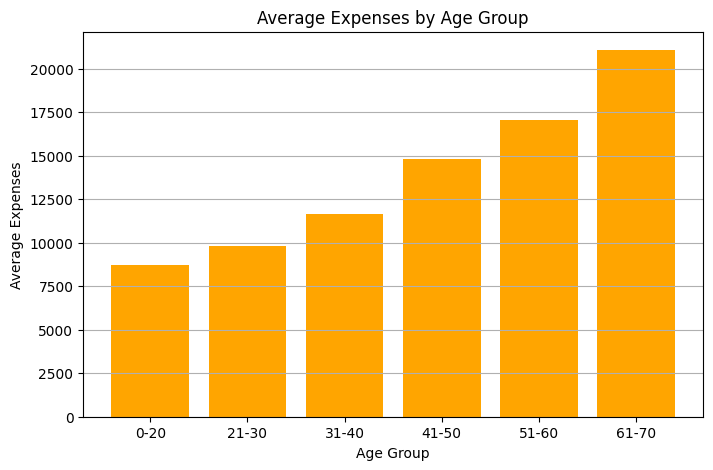

In [4]:
# Age groups

bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100']
data_for_visual_analysis['age_group'] = pd.cut(data_for_visual_analysis['age'], bins=bins, labels=labels)


# Bar plot of Average Expenses by Age Group

average_expenses_age_group = data_for_visual_analysis.groupby('age_group')['expenses'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(average_expenses_age_group['age_group'], average_expenses_age_group['expenses'], color='orange')
plt.title('Average Expenses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()

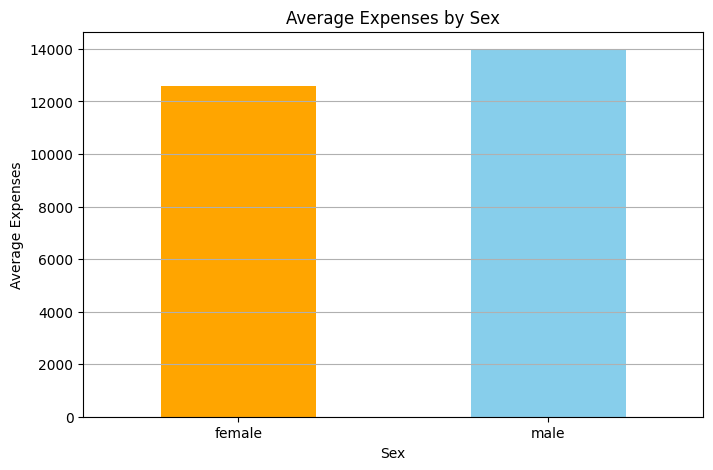

In [5]:
# Bar plot of Average Expenses by Sex

expenses_by_sex = data_for_visual_analysis.groupby('sex')['expenses'].mean()
plt.figure(figsize=(8, 5))
expenses_by_sex.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Average Expenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<ipython-input-6-897b7977596b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_expenses_bmi_group = data_for_visual_analysis.groupby('bmi_group')['expenses'].mean().reset_index()


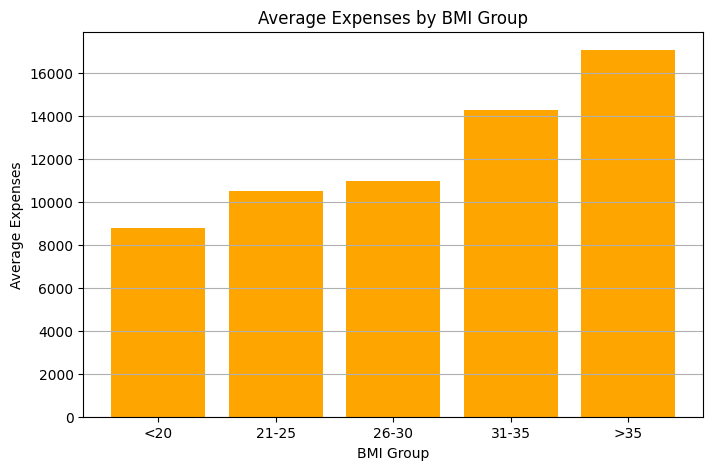

In [6]:
# BMI groups

bins = [0, 20, 25, 30, 35, 100]
labels = ['<20', '21-25', '26-30', '31-35', '>35']
data_for_visual_analysis['bmi_group'] = pd.cut(data_for_visual_analysis['bmi'], bins=bins, labels=labels, right=False)


# Bar plot of Average Expenses by BMI Group

average_expenses_bmi_group = data_for_visual_analysis.groupby('bmi_group')['expenses'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(average_expenses_bmi_group['bmi_group'], average_expenses_bmi_group['expenses'], color='orange')
plt.title('Average Expenses by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()

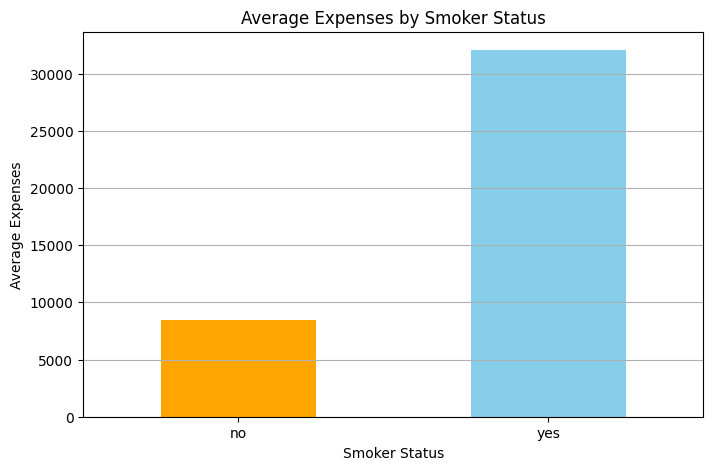

In [7]:
# Bar plot of Average Expenses by Smoker Status

expenses_by_smoker = data_for_visual_analysis.groupby('smoker')['expenses'].mean()
plt.figure(figsize=(8, 5))
expenses_by_smoker.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Average Expenses by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

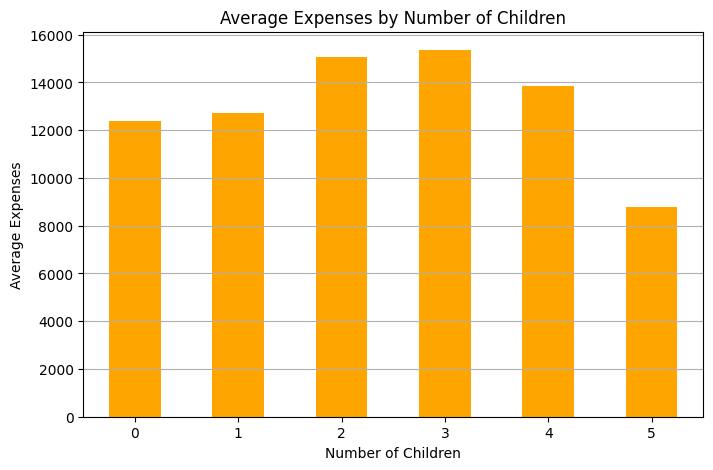

In [8]:
# Bar plot of Average Expenses by Number of Children

expenses_by_number_of_children = data_for_visual_analysis.groupby('children')['expenses'].mean()
plt.figure(figsize=(8, 5))
expenses_by_number_of_children.plot(kind='bar', color='orange')
plt.title('Average Expenses by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

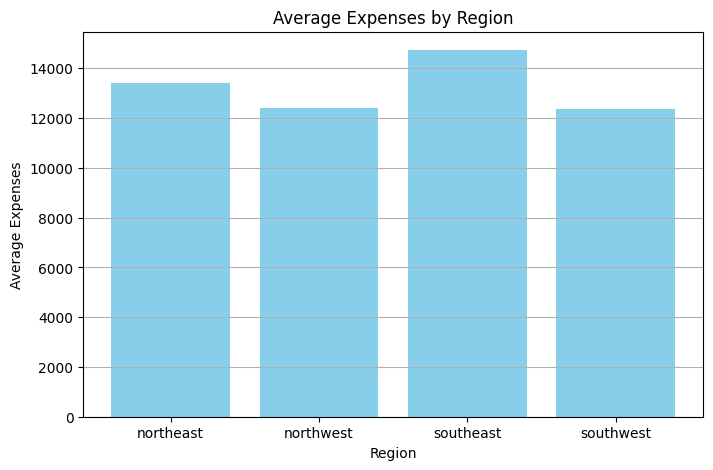

In [9]:
# Bar plot of Average Expenses by Region

average_expenses_region = data_for_visual_analysis.groupby('region')['expenses'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(average_expenses_region['region'], average_expenses_region['expenses'], color='skyblue')
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()

In [10]:
data_for_model = dataset.copy()

In [11]:
# Convert categorical data to numbers

data_for_model['smoker'] = data_for_model['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

data_for_model['sex'] = data_for_model['sex'].apply(lambda x: 1 if x == 'female' else 0)

unique_regions = data_for_model['region'].unique()
for region in unique_regions:
    data_for_model[region] = data_for_model['region'].apply(lambda x: 1 if x == region else 0)
data_for_model.drop(columns=['region'], inplace=True)

In [12]:
# Separate target data and features

target = data_for_model.pop('expenses')
features = data_for_model

In [13]:
# Separate data into train_dataset and and test_dataset

shuffled_indices = np.arange(features.shape[0])
np.random.shuffle(shuffled_indices)
split_index = int(0.8 * len(shuffled_indices))

train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

train_dataset = features.iloc[train_indices]
test_dataset = features.iloc[test_indices]
train_labels = target.iloc[train_indices]
test_labels = target.iloc[test_indices]

In [14]:
# Build and train the regression model

model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(features.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.05, rho=0.9),
    loss='mae',
    metrics=['mae', 'mse']
)

model.fit(
    train_dataset,
    train_labels,
    epochs=60,
    shuffle=True,
    verbose="auto"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9340.7998 - mae: 9340.7998 - mse: 201308384.0000
Epoch 2/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7466.2446 - mae: 7466.2446 - mse: 163920112.0000
Epoch 3/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7461.8389 - mae: 7461.8389 - mse: 157302576.0000
Epoch 4/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7101.8379 - mae: 7101.8379 - mse: 145960112.0000
Epoch 5/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6640.9268 - mae: 6640.9268 - mse: 124109520.0000
Epoch 6/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5529.4341 - mae: 5529.4341 - mse: 85504936.0000
Epoch 7/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5320.4595 - mae: 5320.4595 - mse: 74679280.0000
Epoch 8/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4713.1523 - mae: 4713.1523 - mse: 52661196.0000
Epoch 9/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4741.2368 - mae: 4741.2368 - mse: 58123360.0000
Epoch 10/60
34/34 ━━━━━━━━━━━━━━━━━━━━ 1

In [15]:
model.evaluate(
    test_dataset,
    test_labels,
    verbose='auto'
)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3030.4758 - mae: 3030.4758 - mse: 25300060.0000  


[3151.329833984375, 3151.329833984375, 28736194.0]

9/9 - 0s - 4ms/step - loss: 3151.3298 - mae: 3151.3298 - mse: 28736194.0000
Testing set Mean Abs Error: 3151.33 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


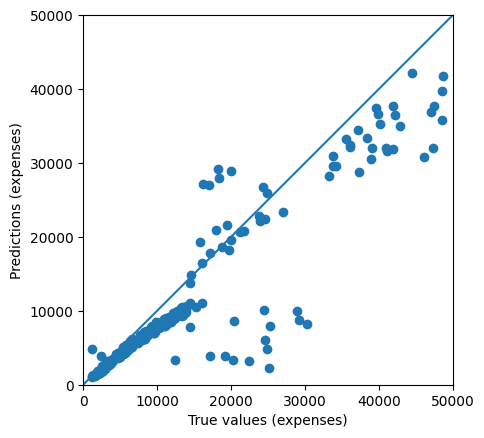

In [16]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
